In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from train import train
from evaluate import load_model_inference, evaluate, build_search_index
from utils import build_all_vocabs
from sklearn.model_selection import train_test_split
from model import DualEncoder

torch.manual_seed(189)

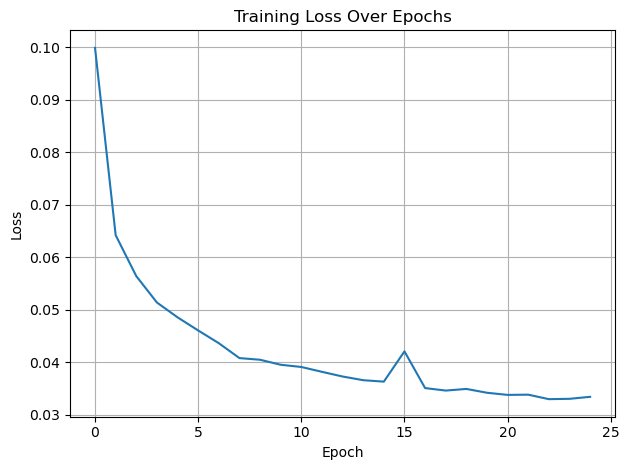

In [2]:
loss_info = pd.read_csv("/home/gort/Projects/coffee-rating/data/outputs/loss-info/loss_info_8_11.csv")
plt.plot(np.arange(25), loss_info["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.tight_layout()
plt.grid()
plt.show();

In [ ]:
# compute test score for each epoch
test_data_path = "/home/gort/Projects/coffee-rating/data/processed/test_data_8_11.csv"
train_data_path = "/home/gort/Projects/coffee-rating/data/processed/training_data.jsonl"
model_paths = [f"/home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_{epoch+1}.pth" for epoch in range(25)]

test_data = pd.read_csv(test_data_path)

# first compute for baseline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint = torch.load(model_paths[0], map_location=device)
vocabs = checkpoint["vocabs"]
model = DualEncoder(vocabs, numerical_dim=10).to(device)
model.eval()

evaluation_results = []
test_score = evaluate(model, test_data, vocabs, train_data_path, device)
evaluation_results.append(test_score)

for model_path in model_paths:
    model, _= load_model_inference(model_path, 10, device)
    test_score = evaluate(model, test_data, vocabs, train_data_path, device)
    evaluation_results.append(test_score)

/tmp/ipykernel_104314/836186026.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_paths[0], map_location=device)



Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 92.10it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries:  93%|█████████▎| 9144/9828 [00:41<00:03, 210.80it/s]